In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [10]:
df = pd.read_csv('/content/drive/MyDrive/deep_learning_bootcamp/day10/spam.csv',
                 delimiter=',',
                 encoding='latin-1')
df.head(8)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [12]:
 df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
         axis=1,
         inplace=True)
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam message')

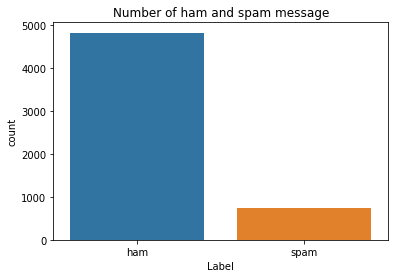

In [14]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam message')

In [15]:
# Mapping spam as 1 and Non spam as 0
df['v1'] = df['v1'].map( {'spam': 1, 'ham': 0} )

In [16]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# help in text processing 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# help in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Flatten, Dropout, Embedding
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

In [22]:
x = df['v2'].values
y = df['v1'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [31]:
print(x_train)

["No I'm in the same boat. Still here at my moms. Check me out on yo. I'm half naked."
 '(Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..'
 'They r giving a second chance to rahul dengra.' ...
 "Prabha..i'm soryda..realy..frm heart i'm sory"
 'Nt joking seriously i told' 'In work now. Going have in few min.']


In [24]:
t = Tokenizer()
t.fit_on_texts(x_train)
encoding_train = t.texts_to_sequences(x_train)
encoding_test = t.texts_to_sequences(x_test)
print(encoding_train[0:2])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225]]


In [28]:
max_length = 8
padded_train = pad_sequences(encoding_train,
                             maxlen=max_length,
                             padding='post')
padded_test = pad_sequences(encoding_test,
                            maxlen=max_length,
                            padding='post')
print(padded_train)
print(padded_test)

[[ 322   10   53 ...   30  349 1990]
 [1992 2558   21 ...  203 1025  225]
 [  83 1443    4 ...    2 3794 3795]
 ...
 [1477   30 2063 ...  239   30 2064]
 [ 763 1679 1161 ...    0    0    0]
 [   8  155   20 ...    8  290  175]]
[[1650   19  738 ... 3023   35 1285]
 [ 433    9   74 ... 1097 1806 1171]
 [   2  173   53 ...  264 7182  208]
 ...
 [ 235  167    6 ...    3   23  139]
 [  32    5 1372 ...    0    0    0]
 [  17  103 2755 ...  692  389  335]]


In [29]:
vocab_size = len(t.word_index) + 1

# defining the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(SimpleRNN(24, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

In [30]:
# compiling the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
# early stopping - stop training when a monitoring metrics has stopped improving
early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=10)

#fit the model
model.fit(x=padded_train,
          y=y_train,
          epochs=50,
          validation_data=(padded_test, y_test),
          verbose=1,
          callbacks=[early_stop])

Epoch 1/50
140/140 [==============================] - 5s 11ms/step - loss: 0.2121 - accuracy: 0.9253 - val_loss: 0.1129 - val_accuracy: 0.9632
Epoch 2/50
140/140 [==============================] - 1s 7ms/step - loss: 0.0654 - accuracy: 0.9800 - val_loss: 0.0870 - val_accuracy: 0.9758
Epoch 3/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0411 - accuracy: 0.9868 - val_loss: 0.0828 - val_accuracy: 0.9758
Epoch 4/50
140/140 [==============================] - 1s 7ms/step - loss: 0.0274 - accuracy: 0.9926 - val_loss: 0.0840 - val_accuracy: 0.9758
Epoch 5/50
140/140 [==============================] - 1s 7ms/step - loss: 0.0198 - accuracy: 0.9953 - val_loss: 0.0819 - val_accuracy: 0.9785
Epoch 6/50
140/140 [==============================] - 1s 7ms/step - loss: 0.0134 - accuracy: 0.9962 - val_loss: 0.0902 - val_accuracy: 0.9812
Epoch 7/50
140/140 [==============================] - 1s 8ms/step - loss: 0.0103 - accuracy: 0.9969 - val_loss: 0.0867 - val_accuracy: 0.9812
Epoch

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
  print("Classification Report")
  print(classification_report(y_true, y_pred))
  acc_sc = accuracy_score(y_true, y_pred)
  print("Accuracy: " + str(acc_sc))
  return acc_sc

def plot_confusion_matrix(y_true, y_pred):
  mtx = confusion_matrix(y_true, y_pred)
  sns.heatmap(mtx,
              annot=True,
              fmt='d',
              linewidth=.5,
              cmap="Blues",
              cbar=False)
  plt.ylabel('True label')
  plt.xlabel('Predicted Label')

In [38]:
preds = (model.predict(padded_test) > 0.5).astype('int32')

In [40]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.95      0.88      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9775784753363229


0.9775784753363229

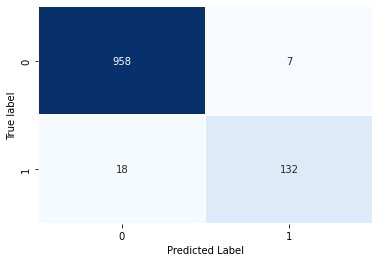

In [43]:
plot_confusion_matrix(y_test, preds)

In [52]:
sms = ["Free ticket to hell, please contact Amith R"]
sms_proc = t.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc,
                         maxlen=max_length,
                         padding='post')
pred = (model.predict(sms_proc) > 0.5).astype('int32').item()
if pred == 1:
  print("SPAM!...Alert")
else :
  print("Not a SPAM")

SPAM!...Alert
